# Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data-project-ml.csv')
data.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
#change everything to integer
data = data.astype(int)

# Univariate Analysis

In [30]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Identify binary features
# binary_features = [column for column in data.columns if data[column].nunique() == 2 and sorted(data[column].unique()) == [0, 1]]

# # Determine the number of rows needed for subplots (with 3 columns)
# n_features = len(data.columns)
# n_rows = n_features // 3 + (1 if n_features % 3 else 0)

# # Create a figure with subplots in 3 columns
# fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
# axs = axs.flatten()  # Flatten the array for easy iteration

# # Plotting
# for i, feature in enumerate(data.columns):
#     if feature in binary_features:
#         # For binary features, plot a pie chart
#         data[feature].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[i], startangle=90)
#         axs[i].set_ylabel('')  # Remove the y-label as it's unnecessary for pie charts
#     elif data[feature].dtype == 'object':
#         # For non-binary categorical data
#         sns.countplot(x=feature, data=data, ax=axs[i])
#     else:
#         # For numerical data
#         sns.histplot(data[feature], bins=10, kde=False, ax=axs[i])
#     axs[i].set_title(feature)

# # Hide any unused axes if the number of features is not a multiple of 3
# for i in range(n_features, n_rows * 3):
#     if i < len(axs):  # Check if index is within the range of axes
#         fig.delaxes(axs[i])

# plt.tight_layout()
# plt.show()


xxx

# Binning

In [4]:
# print unique values for each column
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

HeartDiseaseorAttack: [0 1]
HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker: [1 0]
Stroke: [0 1]
Diabetes: [0 2 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
MentHlth: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]


## BMI

In [5]:
data['BMI'] = pd.cut(data['BMI'], 
                     bins=[0, 18.5, 25, 30, 35, 40, 100], 
                     labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese', 'Morbidly Obese'])


## MenHlth & PhysHlth

In [6]:
# Bin 'MentHlth' into 4 groups
data['MentHlth'] = pd.cut(data['MentHlth'], 
                           bins=[-1, 3, 5, 10, 20, 100], 
                           labels=['a', 'b', 'c', 'd', 'e'])

# Bin 'PhysHlth' into 4 groups
data['PhysHlth'] = pd.cut(data['PhysHlth'], 
                           bins=[-1, 3, 5, 10, 20, 100], 
                           labels=['a', 'b', 'c', 'd', 'e'])

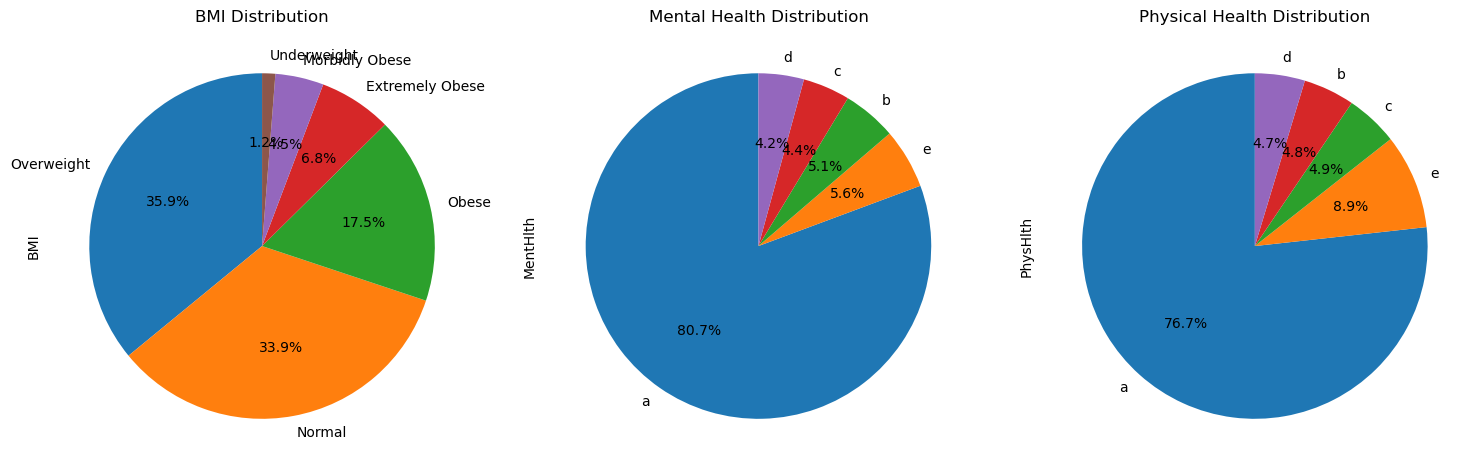

In [7]:
# Create a figure and three subplots arranged in 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie chart for 'BMI'
data['BMI'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[0])
axs[0].set_title('BMI Distribution')

# Plot pie chart for 'MentHlth'
data['MentHlth'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[1])
axs[1].set_title('Mental Health Distribution')

# Plot pie chart for 'PhysHlth'
data['PhysHlth'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[2])
axs[2].set_title('Physical Health Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Bivariate Analysis

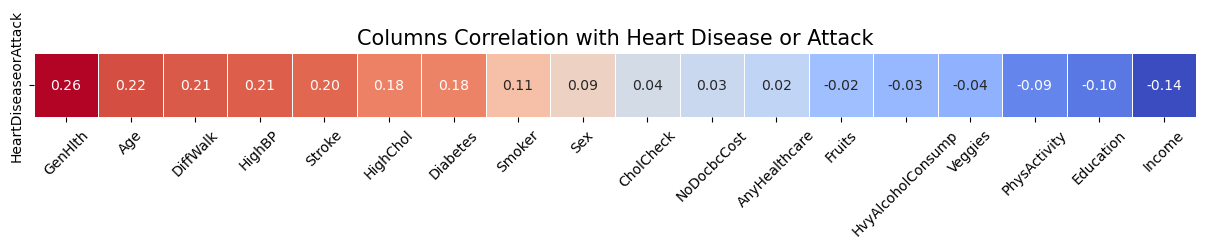

In [58]:
corr = data.corr(method='pearson')
corr_heart = corr[['HeartDiseaseorAttack']].sort_values(by='HeartDiseaseorAttack', ascending=False)
corr_heart = corr_heart.drop('HeartDiseaseorAttack')

plt.figure(figsize=(15, 5))
sns.heatmap(corr_heart.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar=False)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Columns Correlation with Heart Disease or Attack', fontsize=15)
plt.show()

In [101]:
# for every column that just has 0 and 1, add it to the binary list
binary = []
for column in data.columns:
    if len(data[column].unique()) <= 3 and column != 'HeartDiseaseorAttack':
        binary.append(column)
print(binary)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


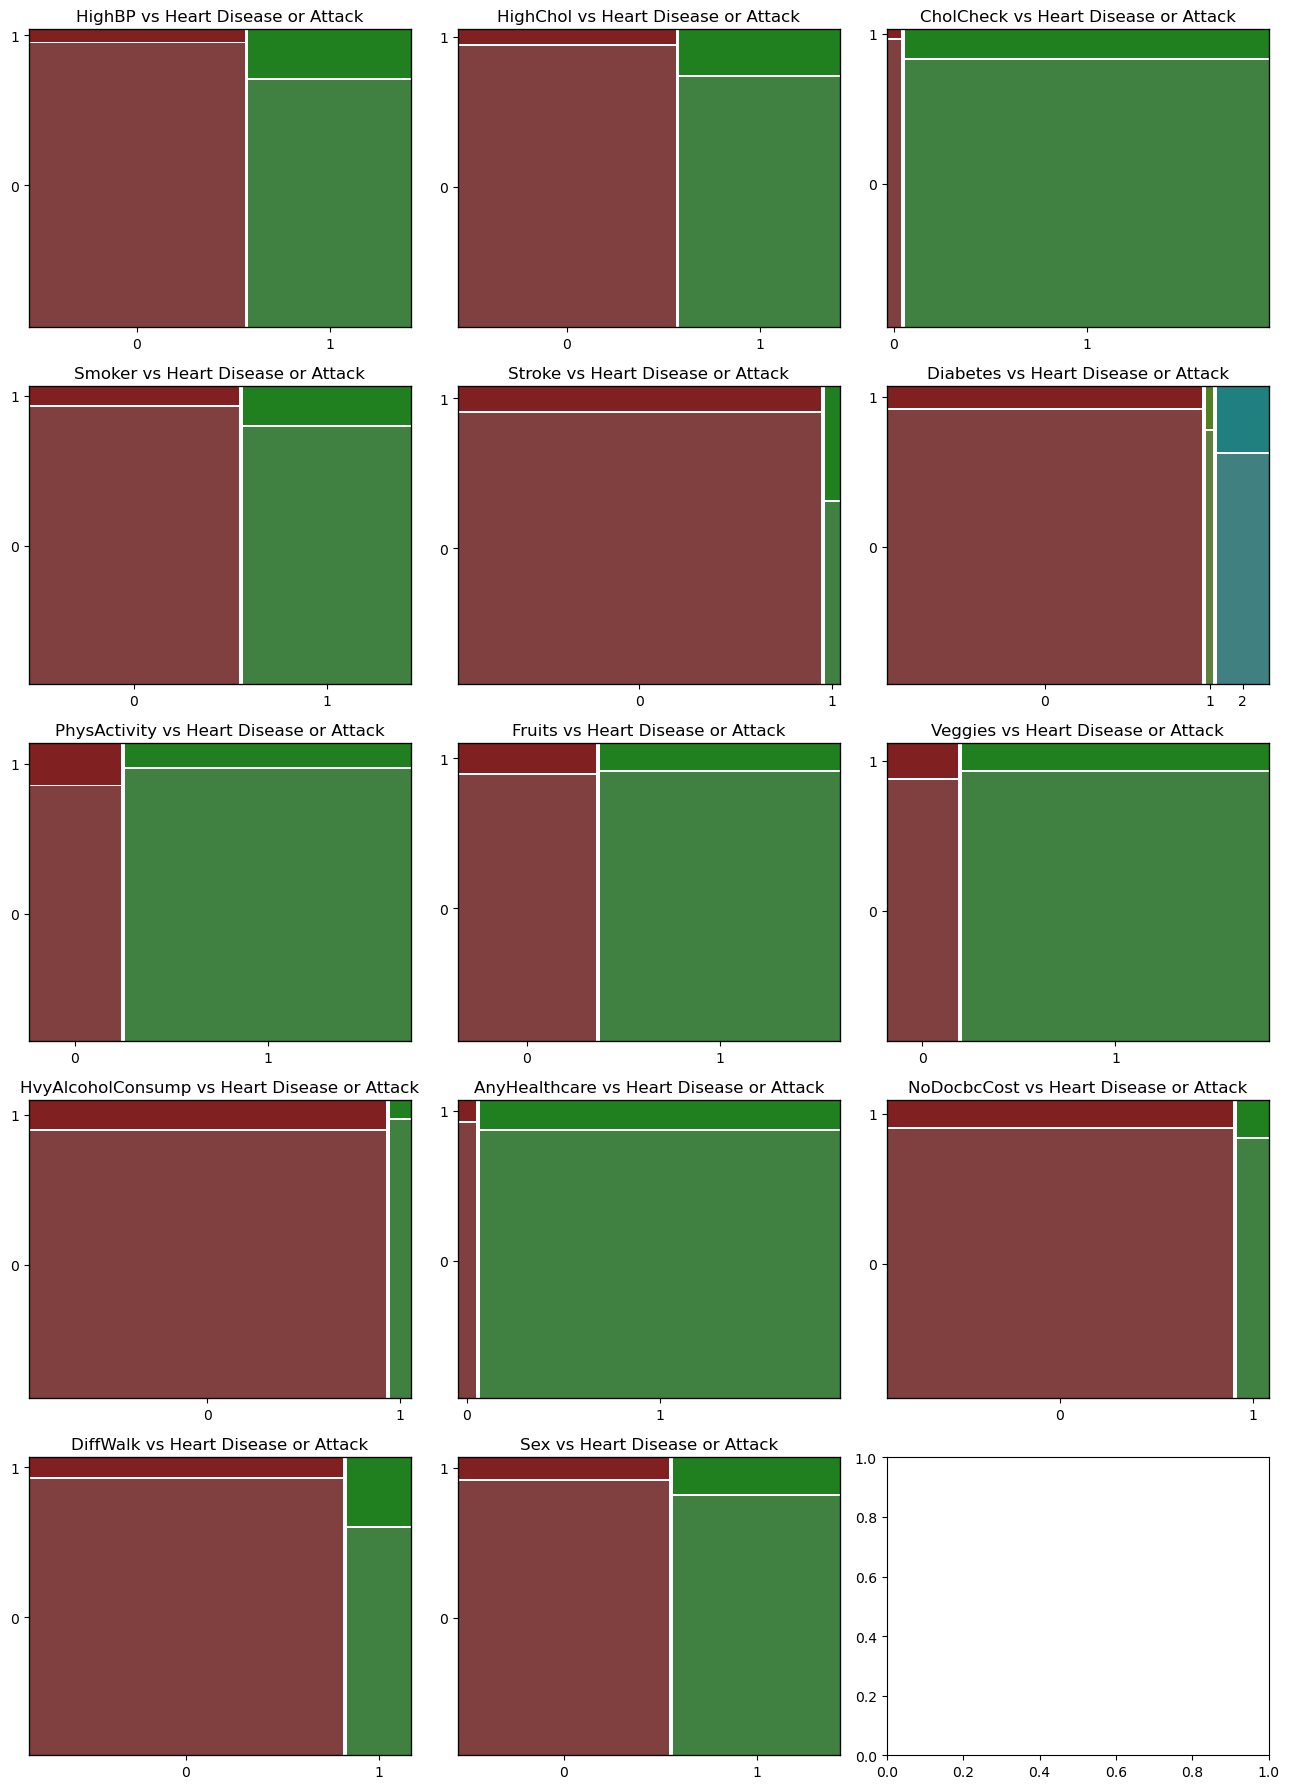

In [120]:
from statsmodels.graphics.mosaicplot import mosaic

fig, axes = plt.subplots(5, 3, figsize=(13, 18))

for i, col in enumerate(binary):
    rows = i // 3
    cols = i % 3
    mosaic_data = pd.crosstab(data[col], data['HeartDiseaseorAttack'])
    mosaic(mosaic_data.stack(), gap=0.01, title=f'{col} vs Heart Disease or Attack', labelizer=lambda k: '', ax=axes[rows, cols])

plt.tight_layout()
plt.show()

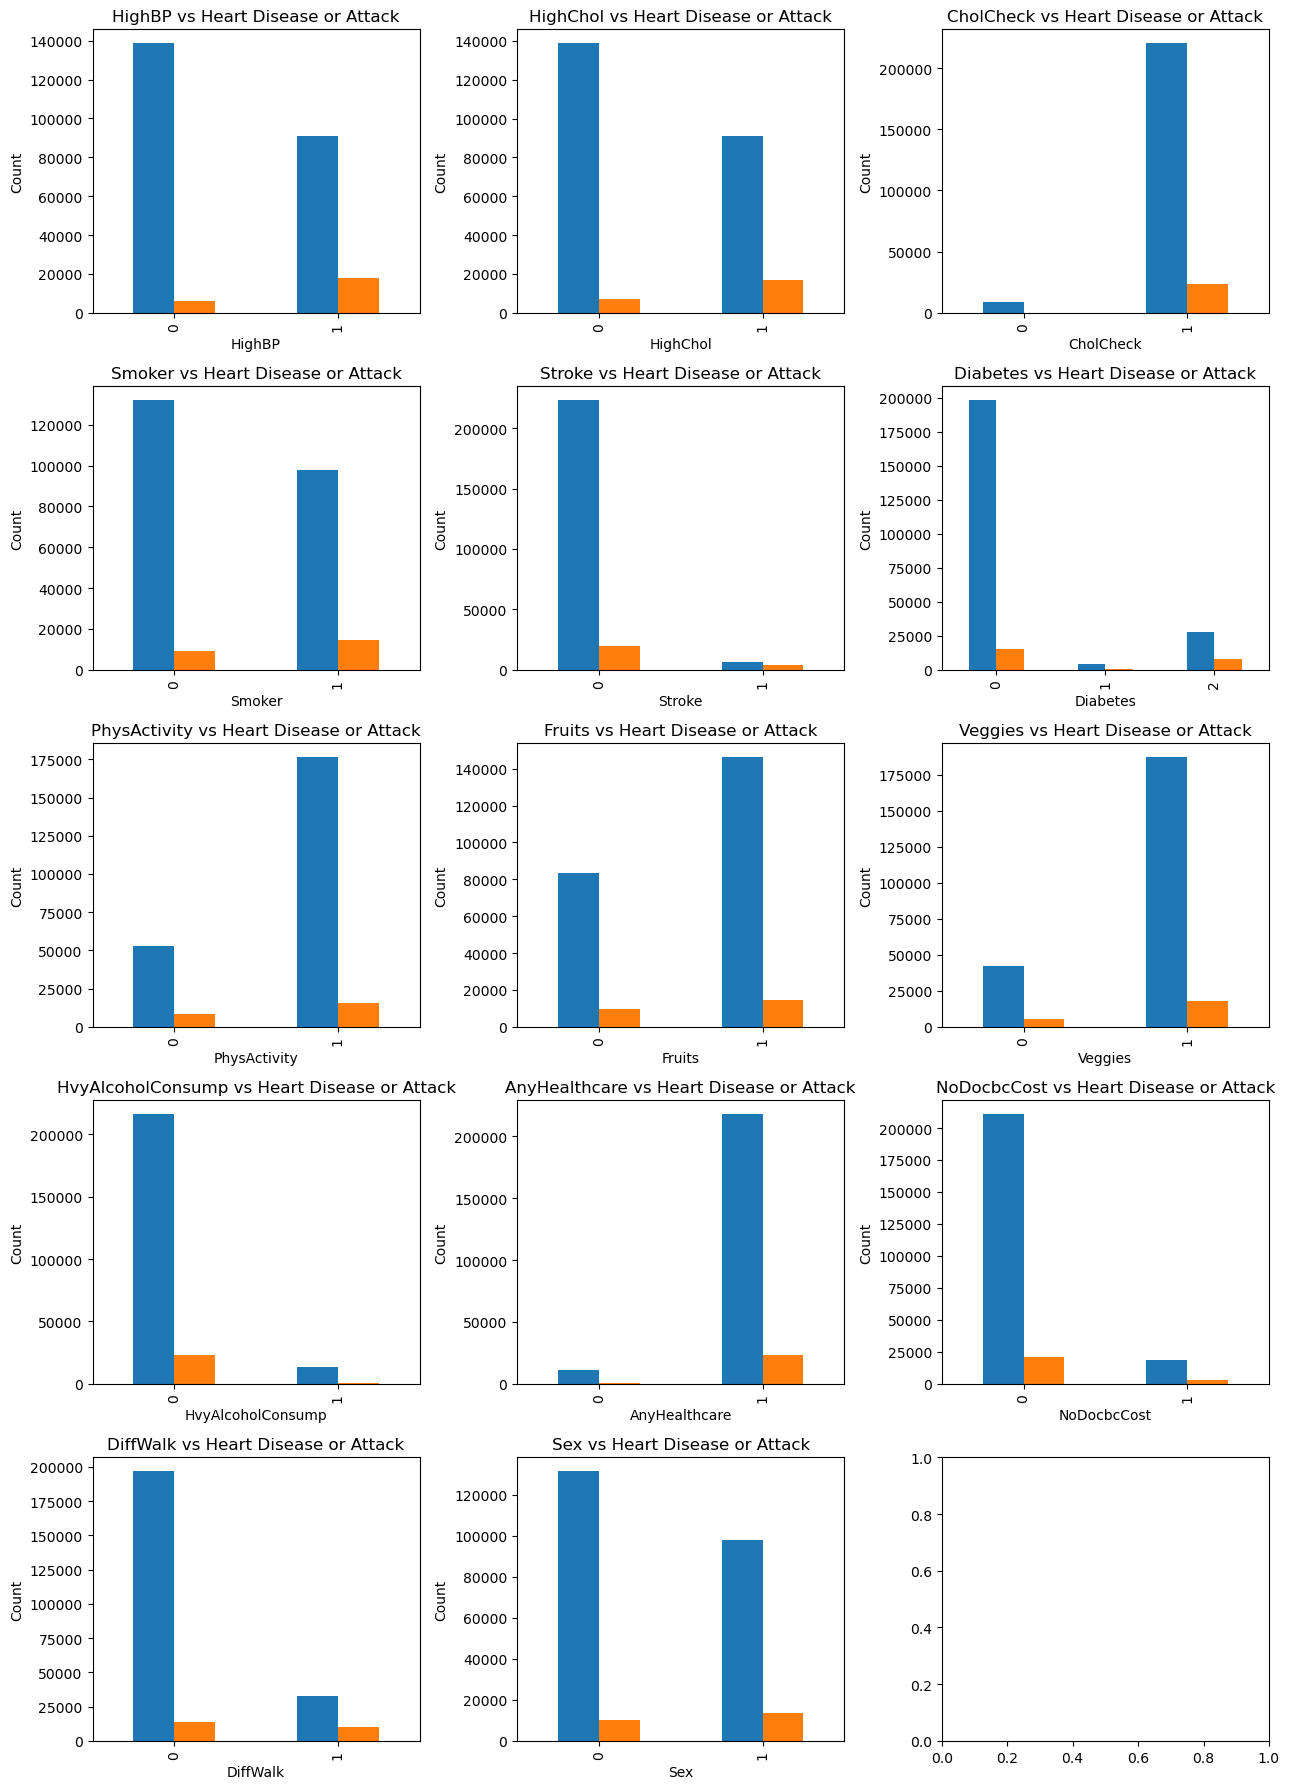

In [146]:
import matplotlib.pyplot as plt

# Define colors for the mosaic plot

fig, axes = plt.subplots(5, 3, figsize=(13, 18))

for i, col in enumerate(binary):
    rows = i // 3
    cols = i % 3
    mosaic_data = pd.crosstab(data[col], data['HeartDiseaseorAttack'])
    mosaic_data.plot(kind='bar', ax=axes[rows, cols], legend=False)
    axes[rows, cols].set_title(f'{col} vs Heart Disease or Attack')
    axes[rows, cols].set_xlabel(col)
    axes[rows, cols].set_ylabel('Count')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

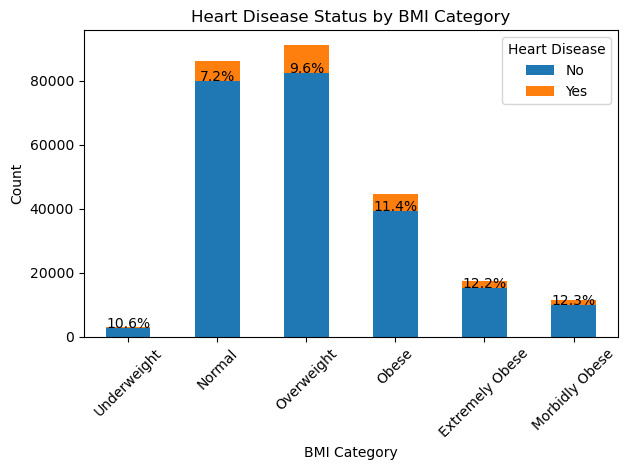

In [145]:
plt.figure(figsize=(10, 6))

heart_disease_counts = data.groupby(['BMI', 'HeartDiseaseorAttack']).size().unstack()

# Calculate percentage of individuals with heart disease within each BMI category
heart_disease_percentage = (heart_disease_counts[1] / heart_disease_counts.sum(axis=1)) * 100

# Plot the grouped bar chart
heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Status by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentage labels
for i, v in enumerate(heart_disease_percentage):
    plt.text(i, heart_disease_counts.iloc[i, 0] + 1, f'{v:.1f}%', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


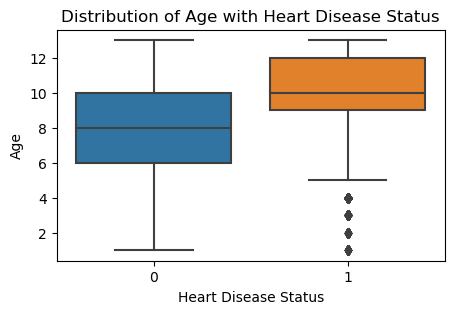

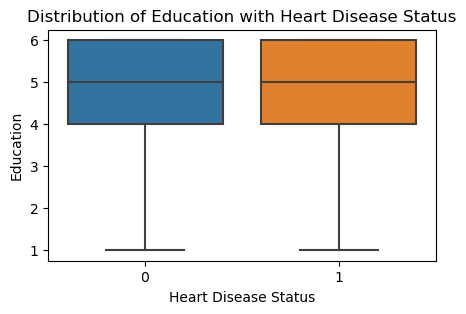

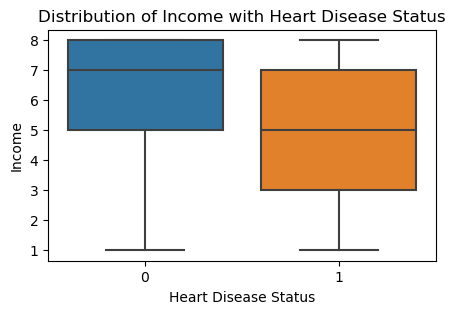

In [144]:
box_column = ['Age', 'Education', 'Income']

for col in box_column:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data, x='HeartDiseaseorAttack', y=col)
    plt.title(f'Distribution of {col} with Heart Disease Status')
    plt.xlabel('Heart Disease Status')
    plt.ylabel(col)
    plt.show()

# Encoding

In [35]:
# Assuming 'data' is your DataFrame and it has been defined earlier
data = pd.get_dummies(data, columns=['BMI', 
                                     'MentHlth', 
                                     'PhysHlth',
                                     'GenHlth',
                                     'Diabetes',
                                     'Age',
                                     'Education',
                                     'Income',
                                     ], drop_first=True)

# Convert the boolean columns to integers
data = data.astype(int)

# print unique values for each column
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

HeartDiseaseorAttack: [0 1]
HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
Smoker: [1 0]
Stroke: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
DiffWalk: [1 0]
Sex: [0 1]
BMI_Normal: [0 1]
BMI_Overweight: [0 1]
BMI_Obese: [0 1]
BMI_Extremely Obese: [1 0]
BMI_Morbidly Obese: [0 1]
MentHlth_b: [0 1]
MentHlth_c: [0 1]
MentHlth_d: [1 0]
MentHlth_e: [0 1]
PhysHlth_b: [0 1]
PhysHlth_c: [0 1]
PhysHlth_d: [1 0]
PhysHlth_e: [0 1]
GenHlth_2: [0 1]
GenHlth_3: [0 1]
GenHlth_4: [0 1]
GenHlth_5: [1 0]
Diabetes_1: [0 1]
Diabetes_2: [0 1]
Age_2: [0 1]
Age_3: [0 1]
Age_4: [0 1]
Age_5: [0 1]
Age_6: [0 1]
Age_7: [0 1]
Age_8: [0 1]
Age_9: [1 0]
Age_10: [0 1]
Age_11: [0 1]
Age_12: [0 1]
Age_13: [0 1]
Education_2: [0 1]
Education_3: [0 1]
Education_4: [1 0]
Education_5: [0 1]
Education_6: [0 1]
Income_2: [0 1]
Income_3: [1 0]
Income_4: [0 1]
Income_5: [0 1]
Income_6: [0 1]
Income_7: [0 1]
Income_8: [0 1]


# Saving the Data

In [37]:
# save the data to a new csv file
data.to_csv('data-project-ml-binned.csv', index=False)